Hypos
- predicting state of a sighting
- Does religion affect sightings?

Which is more accurate?
sentiment_nltk
sentiment_textBlob
sentiment_Stanford
sentiment_VADAR

objectivity_nltk
objectivity_textBlob
objectivity_Stanford
objectivity_VADAR

Add to sightings...
sightings per capita (county)
______________________________________________________

input - sighting (impute religion and party state data)
output - state of sighting

PCA feature selection

Model Selection
- KNN
- SVM
- Naive Bayes

Tuning

Evaluate Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
sightings_w_counties = pd.read_pickle("sightings_with_counties.pkl")
sightings_w_features = pd.read_pickle('sightings_add_features.pkl')

In [3]:
sightings_w_features.columns

Index(['Date_Time', 'Shape', 'Duration', 'Summary', 'Posted', 'Detail_Link',
       'Detail_Summary', 'Detail_Summary_nltk', 'Notes', 'Country', 'City',
       'State', 'Location', 'Lat', 'Lon', 'timezone_str', 'Time_UTC',
       'sentiment_Vader', 'sentiment_nltk', 'sentiment_TextBlob',
       'objectivity_TextBlob'],
      dtype='object')

In [4]:
state_abr = {"Hawaii":"HI", "Alaska":"AK", "Washington":"WA", "Oregon":"OR", "California":"CA",
                        "Arizona":"AZ", "Utah":"UT", "Idaho":"ID", "Montana":"MT", "Wyoming":"WY", "Colorado":"CO",
                        "New Mexico":"NM", "Texas":"TX", "Oklahoma":"OK", "Kansas":"KS", "Nebraska":"NE", 
                        "South Dakota":"SD", "North Dakota":"ND", "Minnesota":"MN", "Iowa":"IA", "Missouri":"MO",
                        "Arkansas":"AR", "Louisiana":"LA", "Wisconsin":"WI", "Illinois":"IL", "Mississippi":"MS",
                        "Alabama":"AL", "Georgia":"GA", "Florida":"FL", "Tennessee":"TN", "Kentucky":"KY", "Indiana":"IN",
                        "Michigan":"MI", "South Carolina":"SC", "North Carolina":"NC", "Virginia":"VA",
                        "West Virginia":"WV", "Ohio":"OH", "Pennsylvania":"PA", "Maryland":"MD", "Delaware":"DE",
                        "New Jersey":"NJ", "New York":"NY", "Connecticut":"CT", "Rhode Island":"RI", 
                        "Massachusetts":"MA", "Vermont":"VT", "New Hampshire":"NH", "Maine":"ME",
                        "District of Columbia":"DC", "Nevada":"NV", "Puerto Rico":"PR"}

In [5]:
features = pd.read_pickle("featuresCapstone.pkl")

feature_columns = ['rel0_2007', 'rel1_2007', 'rel2_2007', 'rel3_2007', 'rel4_2007', 'rel5_2007', 'par0_2007', 'par1_2007', 'par2_2007', 'par3_2007', 'rel0_2014', 'rel1_2014', 'rel2_2014', 'rel3_2014', 'rel4_2014', 'rel5_2014', 'par0_2014', 'par1_2014', 'par2_2014', 'par3_2014',]
states = features.state.unique()

for state in states:
    state_abbr = state_abr[state]
    for c in feature_columns:
        # test = features.loc[features.state == state, c].unique()[0]
        sightings_w_features.loc[(sightings_w_features.State == state_abbr), c] = features.loc[features.state == state, c].unique()[0]

validation_cols = feature_columns.copy()
validation_cols.append("State")

states_to_remove = sightings_w_features.loc[sightings_w_features.rel0_2007.isnull()==True, validation_cols].State.unique()
sightings_w_features = sightings_w_features[sightings_w_features.State.isin(states_to_remove)==False]

try:
    sightings_w_features.drop(["Notes"], axis=1, inplace=True)
except:
    print("Column(s) already gone.")
sightings_w_features.isnull().sum()

Date_Time                   0
Shape                       0
Duration                    0
Summary                     0
Posted                      0
Detail_Link                 0
Detail_Summary              0
Detail_Summary_nltk         0
Country                     0
City                        0
State                       0
Location                    0
Lat                         0
Lon                         0
timezone_str                0
Time_UTC                    0
sentiment_Vader             0
sentiment_nltk              0
sentiment_TextBlob          0
objectivity_TextBlob        0
rel0_2007                   0
rel1_2007                   0
rel2_2007                   0
rel3_2007                   0
rel4_2007                 181
rel5_2007                4887
par0_2007                   0
par1_2007                   0
par2_2007                   0
par3_2007                   0
rel0_2014                   0
rel1_2014                   0
rel2_2014                   0
rel3_2014 

In [6]:
for c in feature_columns:
    sightings_w_features.loc[sightings_w_features[c].isnull(), c] = 0

In [7]:
sightings_w_features.isnull().sum()

Date_Time               0
Shape                   0
Duration                0
Summary                 0
Posted                  0
Detail_Link             0
Detail_Summary          0
Detail_Summary_nltk     0
Country                 0
City                    0
State                   0
Location                0
Lat                     0
Lon                     0
timezone_str            0
Time_UTC                0
sentiment_Vader         0
sentiment_nltk          0
sentiment_TextBlob      0
objectivity_TextBlob    0
rel0_2007               0
rel1_2007               0
rel2_2007               0
rel3_2007               0
rel4_2007               0
rel5_2007               0
par0_2007               0
par1_2007               0
par2_2007               0
par3_2007               0
rel0_2014               0
rel1_2014               0
rel2_2014               0
rel3_2014               0
rel4_2014               0
rel5_2014               0
par0_2014               0
par1_2014               0
par2_2014   

In [8]:
sightings_w_features[sightings_w_features.sentiment_nltk.isnull()|sightings_w_features.sentiment_TextBlob.isnull()|sightings_w_features.objectivity_TextBlob.isnull()]

,Date_Time,Shape,Duration,Summary,Posted,Detail_Link,Detail_Summary,Detail_Summary_nltk,Country,City,...,rel0_2014,rel1_2014,rel2_2014,rel3_2014,rel4_2014,rel5_2014,par0_2014,par1_2014,par2_2014,par3_2014


In [9]:
len(sightings_w_features)

60969

In [10]:
from sklearn.preprocessing import LabelEncoder

def encode_state(s):
    return le.transform([s])
    
le = LabelEncoder()

sightings_states = pd.DataFrame()
sightings_states["State"] = sightings_w_features.State.unique()
le.fit(sightings_states["State"])

sightings_w_features["State_num"] = le.transform(sightings_w_features["State"])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sightings_w_features["time_num"] = sightings_w_features["Time_UTC"].astype(int)

trans_cols = ["time_num"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
sightings_w_features[trans_cols] = numeric_transformer.fit_transform(sightings_w_features[trans_cols])

In [12]:
len(sightings_w_counties), len(sightings_w_features)

(61069, 60969)

In [13]:
sightings = sightings_w_features.join(sightings_w_counties[['FIPS', 'County']], how="inner")
len(sightings)

60412

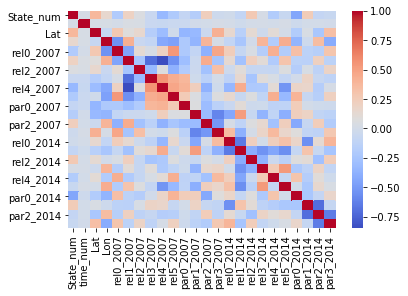

In [14]:
corr_features = ['State_num', 'time_num', 'Lat', 'Lon', 'rel0_2007', 'rel1_2007', 'rel2_2007',
                 'rel3_2007', 'rel4_2007', 'rel5_2007', 
                 'par0_2007', 'par1_2007', 'par2_2007', 'par3_2007', 'rel0_2014', 'rel1_2014', 
                 'rel2_2014', 'rel3_2014', 'rel4_2014', 'rel5_2014', 'par0_2014', 'par1_2014', 
                 'par2_2014', 'par3_2014']
sns.heatmap(sightings[corr_features].corr(), cmap= 'coolwarm');

In [15]:
sightings.dtypes

Date_Time                    datetime64[ns]
Shape                                object
Duration                             object
Summary                              object
Posted                               object
Detail_Link                          object
Detail_Summary                       object
Detail_Summary_nltk                  object
Country                              object
City                                 object
State                                object
Location                             object
Lat                                 float64
Lon                                 float64
timezone_str                         object
Time_UTC                datetime64[ns, UTC]
sentiment_Vader                     float64
sentiment_nltk                      float64
sentiment_TextBlob                  float64
objectivity_TextBlob                float64
rel0_2007                           float64
rel1_2007                           float64
rel2_2007                       

In [16]:
fileName = 'sightings_merged.pkl'
sightings.to_pickle(fileName)

In [ ]:
"""
Start here!!!!!!!!!!!
"""
sightings = pd.read_pickle('sightings_merged.pkl')

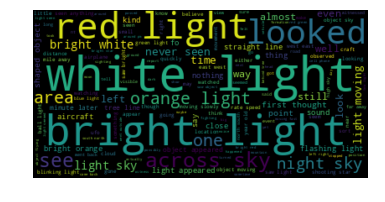

In [17]:
from wordcloud import WordCloud

text = " ".join(t for t in sightings.Detail_Summary_nltk.astype(str))
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [18]:
sightings.Shape.unique()

array(['Circle', 'Light', 'Cone', 'Sphere', 'Chevron', 'Fireball',
       'Triangle', 'Unknown', 'Oval', 'Formation', 'Flash', 'Cigar',
       'Other', 'Changing', 'Disk', 'Rectangle', 'Cylinder', '',
       'Teardrop', 'Diamond', 'Egg', 'Cross'], dtype=object)

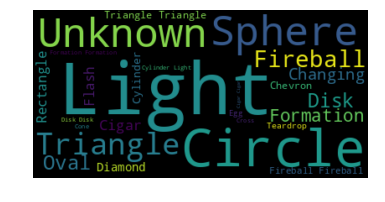

In [19]:
text = " ".join(t for t in sightings.Shape.astype(str))
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [20]:
import re
import nltk
from nltk import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize

# creating the Bag of words Model
BagOfWords = []
for s in sightings['Detail_Summary_nltk']:
    s = re.sub(r' . ', " ", s)
    s = re.sub(r'[\(\)\[\]\^\$\+\*\.\?\/!@#%&{}\'\",;:]', "", s)
    words = nltk.word_tokenize(s)
    BagOfWords.append(words)

BagOfWords_series = pd.Series(BagOfWords)
BagOfWords_list = ''.join(BagOfWords_series.str.join(',').tolist()).split(',')

In [21]:
from collections import Counter

ngram_counts = Counter(ngrams(BagOfWords_list, 3))
ngram_counts.most_common(10)

[(('bright', 'white', 'light'), 2410),
 (('never', 'seen', 'anything'), 2220),
 (('seen', 'anything', 'like'), 1749),
 (('high', 'rate', 'speed'), 1305),
 (('bright', 'orange', 'light'), 969),
 (('moving', 'across', 'sky'), 954),
 (('saw', 'bright', 'light'), 707),
 (('light', 'looked', 'like'), 696),
 (('looked', 'like', 'star'), 676),
 (('get', 'better', 'look'), 658)]

In [22]:
ngram_counts = Counter(ngrams(BagOfWords_list, 4))
ngram_counts.most_common(10)

[(('never', 'seen', 'anything', 'like'), 1459),
 (('light', 'moving', 'across', 'sky'), 266),
 (('moving', 'high', 'rate', 'speed'), 186),
 (('saw', 'bright', 'white', 'light'), 173),
 (('moving', 'slowly', 'across', 'sky'), 170),
 (('like', 'nothing', 'ever', 'seen'), 161),
 (('seen', 'anything', 'like', 'life'), 149),
 (('unlike', 'anything', 'ever', 'seen'), 135),
 (('traveling', 'high', 'rate', 'speed'), 130),
 (('light', 'looked', 'like', 'star'), 119)]

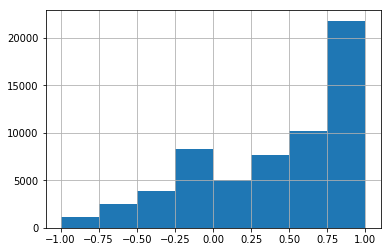

In [23]:
# sentiment_Vader, sentiment_nltk, sentiment_TextBlob, objectivity_TextBlob    
hist = sightings['sentiment_Vader'].hist(bins=8)

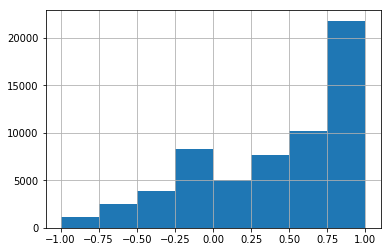

In [24]:
hist = sightings['sentiment_nltk'].hist(bins=8)

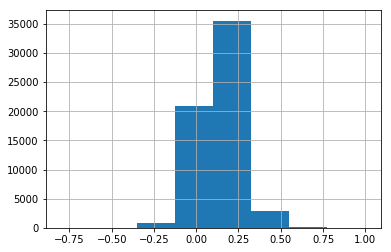

In [25]:
hist = sightings['sentiment_TextBlob'].hist(bins=8)

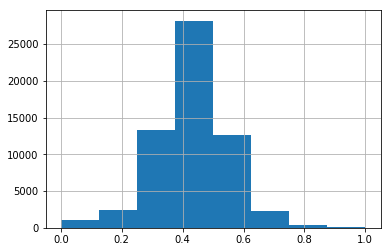

In [26]:
hist = sightings['objectivity_TextBlob'].hist(bins=8)

In [27]:
X = sightings[['time_num', 'Lat', 'Lon', 'rel0_2007', 'rel1_2007', 'rel2_2007',
               'rel3_2007', 'rel4_2007',
               'rel5_2007', 'par0_2007', 'par1_2007', 'par2_2007', 'par3_2007',
               'rel0_2014', 'rel1_2014', 'rel2_2014', 'rel3_2014', 'rel4_2014', 
               'rel5_2014','par0_2014', 'par1_2014', 'par2_2014', 'par3_2014']]

# sentiment_Vader, sentiment_nltk, sentiment_TextBlob, objectivity_TextBlob 
y = sightings.objectivity_TextBlob

In [28]:
from sklearn.decomposition import PCA

for n in range(1, len(X.columns)+1):
    target_number_of_components = n

    pca = PCA(n_components=target_number_of_components)
    pca.fit(X)
    print(f"Total variance accounted using {n} components: {round(pca.explained_variance_ratio_.sum()*100,4)}%")

print(f"Total variance accounted using all components: {round(PCA(n_components=None).fit(X).explained_variance_ratio_.sum(),4)*100}%")

Total variance accounted using 1 components: 91.0671%
Total variance accounted using 2 components: 99.6383%
Total variance accounted using 3 components: 99.9511%
Total variance accounted using 4 components: 99.9701%
Total variance accounted using 5 components: 99.9814%
Total variance accounted using 6 components: 99.9864%
Total variance accounted using 7 components: 99.9909%
Total variance accounted using 8 components: 99.9941%
Total variance accounted using 9 components: 99.9956%
Total variance accounted using 10 components: 99.9968%
Total variance accounted using 11 components: 99.9978%
Total variance accounted using 12 components: 99.9984%
Total variance accounted using 13 components: 99.999%
Total variance accounted using 14 components: 99.9994%
Total variance accounted using 15 components: 99.9996%
Total variance accounted using 16 components: 99.9998%
Total variance accounted using 17 components: 99.9999%
Total variance accounted using 18 components: 100.0%
Total variance account

In [29]:
n_pcs = pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
df.head(len(X.columns))

,0,1
0,PC0,Lon
1,PC1,Lat
2,PC2,time_num
3,PC3,rel1_2007
4,PC4,rel1_2014
5,PC5,par2_2014
6,PC6,rel2_2007
7,PC7,rel3_2014
8,PC8,par3_2014
9,PC9,rel2_2007


In [30]:
target_number_of_components = 2

pca = PCA(n_components=target_number_of_components)
pca.fit(X)
pca.explained_variance_ratio_

array([0.91067146, 0.08571149])

In [31]:
pca_features = []
for p in range(1, target_number_of_components+1):
    pca_features.append("PC" + str(p))
pca_features

pca_transformed = pca.transform(X)

X_princ = pd.DataFrame(data=pca_transformed, columns = pca_features)
X_princ

,PC1,PC2
0,11.223164,6.656041
1,13.335138,0.123428
2,13.155128,10.279742
3,12.181577,8.046493
4,14.456339,1.887547
...,...,...
60407,-4.133264,-1.920070
60408,21.762029,-3.949164
60409,5.757148,-0.588006
60410,14.792118,-5.188248


In [32]:
%%script false --no-raise-error
from sklearn.cluster import KMeans

optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X_princ)
centroids = kmeans.cluster_centers_

In [33]:
%%script false --no-raise-error
plt.scatter(X_princ["PC3"], X_princ["PC2"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("Predicted Clusters")
plt.show()

In [34]:
%%script false --no-raise-error
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_princ)
    distortions.append(kmeanModel.inertia_)

In [35]:
%%script false --no-raise-error
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_princ, y, test_size=.2, random_state=42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48329, 2), (12083, 2), (48329,), (12083,))

In [38]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors._regression import KNeighborsRegressor
from sklearn.tree._classes import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

results_df = pd.DataFrame(columns = ["Model", "Training RMSE", "Training R2", "Test RMSE", "Test R2"])

reg_list = [SGDRegressor(), LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(), SVR(kernel='rbf')]

for mod in reg_list:
    reg_model = mod
    reg_model.fit(X_train, y_train)

    reg_model_pred_train = reg_model.predict(X_train)
    reg_model_pred_test = reg_model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, reg_model_pred_train)
    mse_test = mean_squared_error(y_test, reg_model_pred_test)

    r2_train = r2_score(y_train, reg_model_pred_train)
    r2_test = r2_score(y_test, reg_model_pred_test)
    
    temp = pd.DataFrame({"Model": [mod],
                         "Training RMSE": [mse_train], 
                         "Training R2": [r2_train],
                         "Test RMSE": [mse_test],
                         "Test R2": [r2_test]})
    results_df = results_df.append(temp, ignore_index=True)

In [39]:
results_df.sort_values(by="Test RMSE")

,Model,Training RMSE,Training R2,Test RMSE,Test R2
1,LinearRegression(),0.014658,0.000283,0.014877,-0.000198
5,SVR(),0.014651,0.000826,0.014877,-0.000235
0,SGDRegressor(),0.016280,-0.110298,0.016379,-0.101210
3,KNeighborsRegressor(),0.011640,0.206115,0.017555,-0.180292
2,"(DecisionTreeRegressor(max_features='auto', ra...",0.003598,0.754639,0.019744,-0.327447
4,DecisionTreeRegressor(),0.001274,0.913099,0.027851,-0.872476
